# 신경망 기초 

* 이진분류에 대해 배워보자

참고 사이트 : https://www.tensorflow.org/tutorials?hl=ko

In [ ]:
# 필요한 라이브러리 import 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 준비

In [ ]:
n = 20000 #전체
ts = 4000 #test sample 
vs =4000 #validation sample

In [ ]:
# 균일분포(0,2)에서 랜덤넘버를 생성하여 1.2 이상과 이하로 이진 분류데이터 생성  
x = np.random.uniform(0,2, n)
y=[]
for i in x:
  if i >1.2:
    y.append(1)
  else :
    y.append(0)


In [ ]:
# 데이터에 대한 라벨 확인
df = pd.DataFrame(x)
df['class'] = y
df

,0,class
0,1.855760,1
1,1.458111,1
2,1.235390,1
3,0.306551,0
4,1.977800,1
...,...,...
19995,0.672102,0
19996,1.263453,1
19997,1.114157,0
19998,0.471279,0


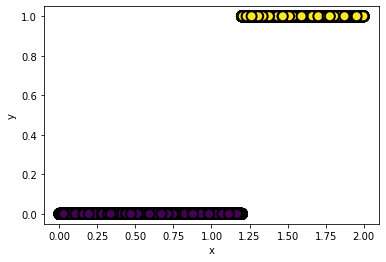

In [ ]:
#이진분류를 plot로 표현하면 0과1로 나뉘어지
plt.scatter(x, y, marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
# train, test, validataion data로 분리 , 20000개의 데이터를 ts, vs 사이즈 4000개씩 분리 
train_df, test_df = train_test_split(df, test_size=ts,random_state=123) #test_size=4000이니까 train_df=16000
train_df, val_df = train_test_split(train_df, test_size=vs,random_state=123) #train_df중에서 4000개를 또 뽑아줬어
len(train_df) #마지막으로 남은train data는 12000

12000

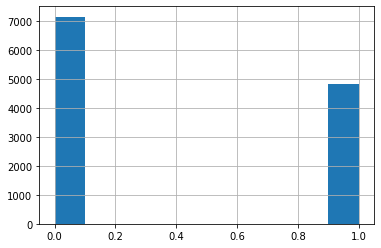

In [ ]:
#class가 어떻게 분포하는지 hist로 확인
train_df['class'].hist()

In [ ]:
#train_df 2개정도만 살펴보자
train_df[:2]

,0,class
7157,1.923879,1
5644,0.713491,0


# 모델링

In [ ]:
#train method를 활용하자, pop은 class로 명령된 열만 뽑아와
# 입력데이터로 정리  
y_train = train_df.pop('class')
x_train = train_df
y_test = test_df.pop('class')
x_test = test_df
y_val = val_df.pop('class')
x_val = val_df
x_train

,0
7157,1.923879
5644,0.713491
12598,0.346182
10253,1.191594
7711,1.201563
...,...
15338,1.649617
9363,0.837108
13724,0.313977
13954,0.934763


In [ ]:
# input_shape, 입력변수의 개수 확인, 지금은 독립변수가 하나이기 때문에 1
train_features = np.array(train_df)
train_features.shape[-1]

1

In [ ]:
# model.add를 통해 다층의 layer를 쌓아서 모델링, 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택 
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(train_features.shape[-1],)))
model.add(keras.layers.Dense(16, activation='relu')) #다시 증폭 16*16
model.add(keras.layers.Dropout(0.5)) #overfitting을 방지하기위한 테크닉중 하나
model.add(keras.layers.Dense(1, activation='sigmoid')) #sigmoid는 0~1의 값을 갖는 값을 출력, 0.5<x 면 1 0.5>x면 0

#최적화 optimizer = adam을 선택, 이 과정을 어떻게 하느냐에 따라 값이 많이 달라져
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#모델 요약해서 보기, paramater값이 많아지면 그만큼 데이터가 많아져야한다, 총 param=321개
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


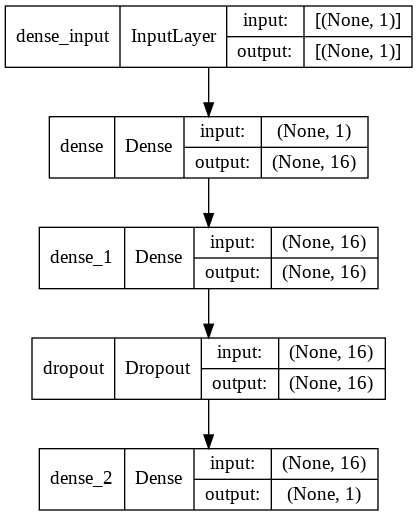

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

# Training

In [ ]:
# 모델 저장 설정, 어떻게 저장?
save_weights = tf.keras.callbacks.ModelCheckpoint("model.hdf5",
                                                  monitor='val_accuracy',
                                                  verbose=1,
                                                  save_best_only=True,
                                                  mode="max",
                                                  save_freq="epoch",
                                                  save_weights_only=True)

In [ ]:
# 모델 학습 및 필요 데이터 저장 , epochs=40 전체 프로세스를 몇번 반복할 것이냐, 한 epochs를 돌때 batch를 256으로 하겠다다.
history = model.fit(x_train, y_train, validation_data=(x_val, y_val) ,
                    epochs=40, 
                    batch_size=256,
                    callbacks=[save_weights])

# 평가

In [ ]:
# model.evaluate로 평가를 하게돼, 훈련된 이미지 분류기는 이 데이터셋에서 거의 99.9%의 정확도를 달성
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

125/125 - 0s - loss: 0.0277 - accuracy: 0.9992 - 325ms/epoch - 3ms/step
Loss:  0.02771860547363758
Accuracy:  0.9992499947547913


In [ ]:
# 학습간 저장된 데이터 확인 , loss&accuracy는 train_df에서 나온것, val_loss&val_accuracy는 val_df에서 평가를 한것
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

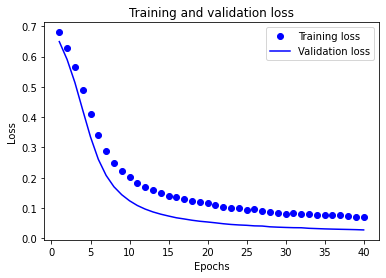

In [ ]:
# 손실과 정확도 도식 , loss는 작을수록 좋은거야
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

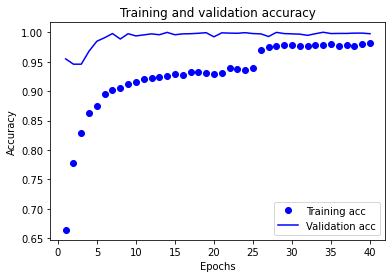

In [ ]:
#validation acc가 높아지다가 어느순간에 감소하는 구간이 있을경우 가장 높은 값을 적용시켜
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# 배포 

In [ ]:
#예측할 임의의 x
new_x = [-1, 0.3, 1.1, 1.2, 2]

In [ ]:
# 저장된 모델 호출 
model.load_weights('model.hdf5')

y_pred = model.predict( new_x)
print(np.round(y_pred).astype(int))

[[0]
 [0]
 [0]
 [0]
 [1]]
